<a href="https://colab.research.google.com/github/221910307006/python_programing-/blob/master/Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler 

In [16]:
df=pd.read_csv("/content/drive/MyDrive/Python/diabetes.csv")

df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


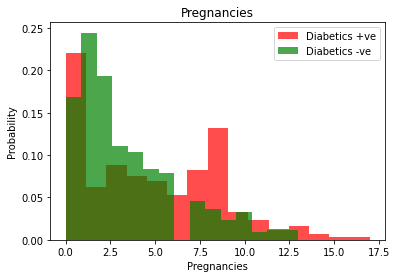

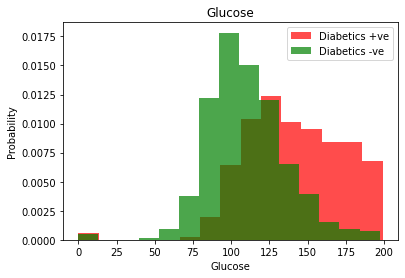

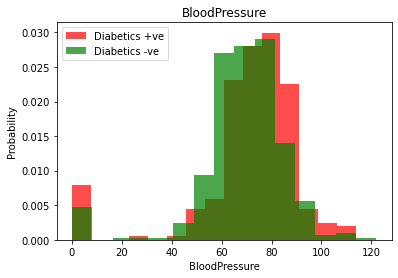

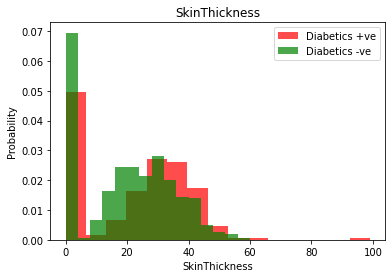

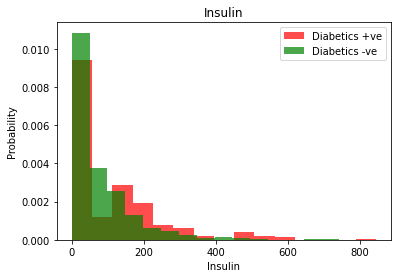

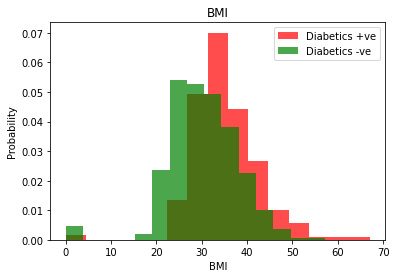

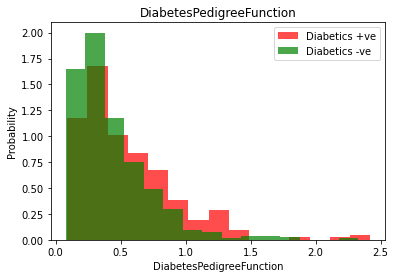

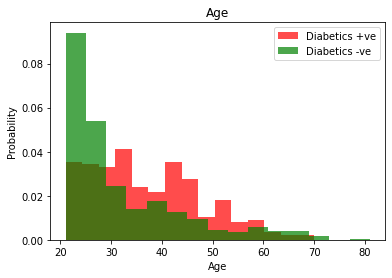

In [17]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='red',label='Diabetics +ve',alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='green',label='Diabetics -ve',alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [32]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values


In [55]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
df1=pd.DataFrame(data,columns=df.columns)

len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [56]:

over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
df2=pd.DataFrame(data,columns=df1.columns)
len(df2[df2['Outcome']==1]), len(df2[df2['Outcome']==0])

(500, 500)

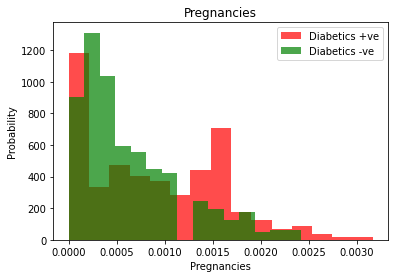

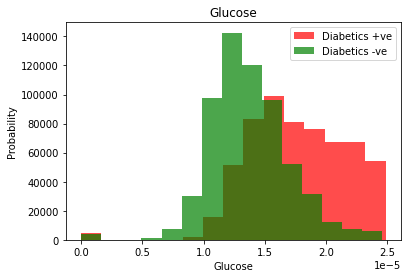

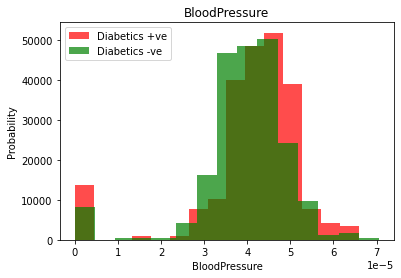

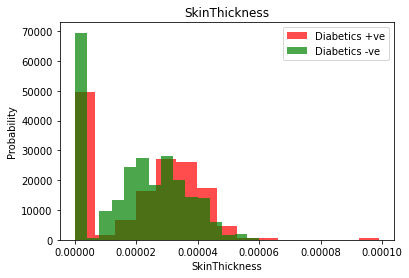

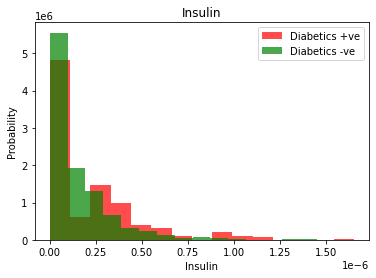

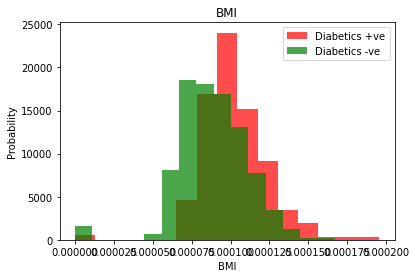

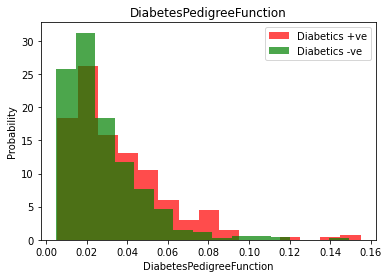

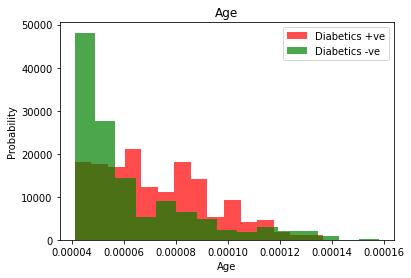

In [57]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='red',label='Diabetics +ve',alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='green',label='Diabetics -ve',alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
# Nueral Network creation
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [60]:
# Compile the nueral network code
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
#fit the model
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.4963
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5250
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5925
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6475
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7025
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7237
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7375
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7613
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7600
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7575
Epoch 11/30
25/25 [

In [61]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7800


[0.4466945230960846, 0.7799999713897705]